In [0]:
%tensorflow_version 1.x
import tensorflow
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime

seed = 42
np.random.seed(seed)
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
REPOSITORY = '/path/to/repository'
os.chdir(REPOSITORY+'/faces_capstone2')

In [0]:
model_metrics_large = pd.read_csv('train_log_large.csv')
model_metrics_large.head()

,Date,Run_Number,Num_Epochs_Tot,Train_Loss,Valid_Loss
0,34:00.3,0,0,NaN,NaN
1,37:00.5,1,20,0.032079,0.075718
2,40:54.7,2,40,0.023910,0.079085
3,43:18.2,3,60,0.021061,0.078972
4,45:32.1,4,80,0.021983,0.083740


Creating a dataframe of epochs vs loss for large scale model and plotting the values. Training and validation loss seem to converge but they are still quite high.

In [0]:
model_loss_large = model_metrics_large[['Num_Epochs_Tot', 'Train_Loss', 'Valid_Loss']].set_index('Num_Epochs_Tot')
model_loss_large.head()

,Train_Loss,Valid_Loss
Num_Epochs_Tot,,
0,NaN,NaN
20,0.032079,0.075718
40,0.023910,0.079085
60,0.021061,0.078972
80,0.021983,0.083740


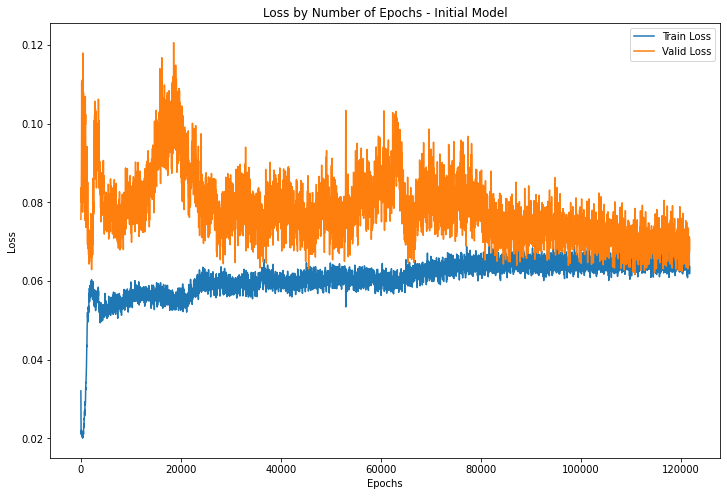

In [0]:
model_loss_large.plot()
plt.title('Loss by Number of Epochs - Initial Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Valid Loss'])
plt.show()

Creating a dataframe of epochs vs loss for reduced model. There is clear evidence of overfitting.

In [0]:
model_metrics_reduced = pd.read_csv('train_log_25c_not_random.csv')
model_metrics_reduced.head()

,epoch,loss,val_loss
0,0,0.078503,0.061113
1,1,0.078245,0.060879
2,2,0.077961,0.060612
3,3,0.077612,0.060283
4,4,0.077180,0.059863


In [0]:
model_loss_reduced = model_metrics_reduced.set_index('epoch')
model_loss_reduced.head()

,loss,val_loss
epoch,,
0,0.078503,0.061113
1,0.078245,0.060879
2,0.077961,0.060612
3,0.077612,0.060283
4,0.077180,0.059863


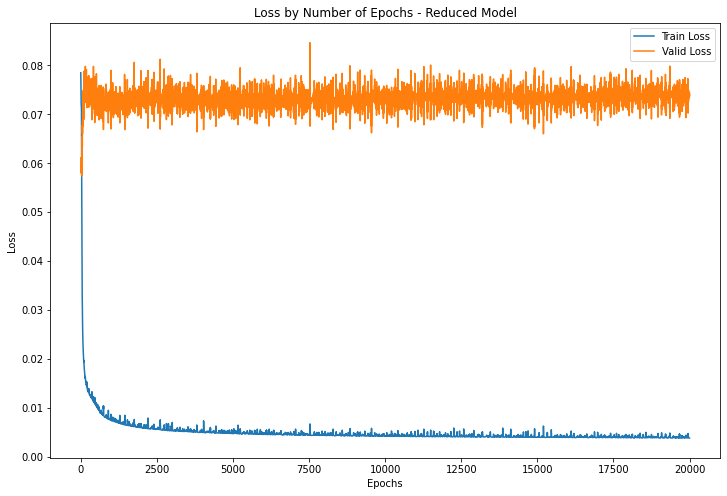

In [0]:
model_loss_reduced.plot()
plt.title('Loss by Number of Epochs - Reduced Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Valid Loss'])
plt.show()